# Part IA Computing: Michaelmas Term
## Exercises 11.1, 11.2 and 11.3

Edwin Bahrami Balani ([`eb677`](mailto:eb677@cam.ac.uk))

> ## Exercise 11.1
> 
> Determine by operating counting the complexity of:
> 
> 1. Dot product between two vectors
> 1. Matrix-vector product
> 1. Matrix-matrix product
> 
> for vectors of length $n$ and matrices of size $n \times n$. (This is a reasoning exercise - you do not need to write a program.)
> 
> 
> ### Optional
> 
> Test the complexity experimentally with your own functions for performing the operations, and
> with the NumPy 'vectorised' equivalents.

1. Dot product: $3n$ array accesses ($2n$ for input and $n$ for output), $n$ operations $\Rightarrow$ complexity is $O(n)$
2. Matrix-vector product: $2n^2 + n$ array accesses, $n^2$ operations $\Rightarrow$ complexity is $O(n^2)$
3. Matrix-matrix product: $(n+1)^2$

> ## Exercise 11.2
> 
> For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

In [32]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 11.2
%matplotlib inline
from math import factorial
import numpy as np
import matplotlib.pyplot as plt

def fact_recur(n):
    if n < 0: # naughty! factorial not defined
        return 666
    if n == 0:
        return 1
    return n*fact_recur(n-1)

$n-1$ multiplications, $n-1$ subtractions $\Rightarrow O(n)$

In [ ]:
# Create array of problem sizes we want to test (powers of 2)
N = np.arange(0,20)
# Create an array of random numbers
x = np.random.rand(N[-1])

# Time fact_recur on arrays of different lengths
times = []


for n in N:
    t = %timeit -n100 -r100 -o -q fact_recur(n)
    times.append(t.best)

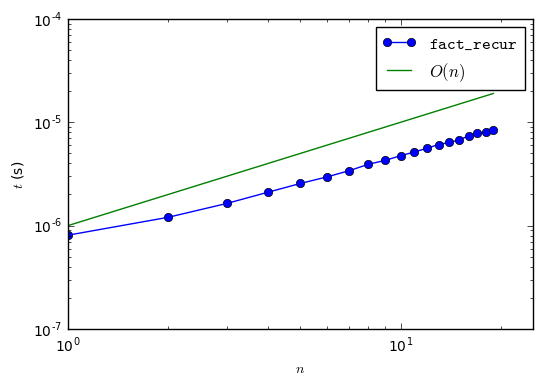

In [34]:
# Plot timings
plt.loglog(N, times, marker='o', label='$\mathtt{fact\_recur}$')

# Show reference line of O(n)
plt.loglog(N, 1e-6*N, label='$O(n)$')

# Add labels
plt.xlabel('$n$')
plt.xlim(0, 25)
plt.ylabel('$t$ (s)')
plt.legend(loc=0);

> ## Exercise 11.3
> 
> Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:
> 
> ```python
> n = 100
> A = np.random.rand(n, n)
> ```
> 
> and the determinant can be computed by:
> 
> ```python
> det = np.linalg.slogdet(A)
> ```
> 
> Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime. Use a log-log scale for
your plot.

In [55]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 11.3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def lucas(m, n, limit=10):
    i = 0
    while i < limit:
        m, n = (n, m+n)
        yield n
        i += 1
    raise StopIteration

N = np.array(list(lucas(5, 7, 12)))
times = []
for n in N:
    print(n, end=' ')
    A = np.random.rand(n, n)
    time = %timeit -q -n5 -o det = np.linalg.slogdet(A)
    times.append(time.best)

12 19 31 50 81 131 212 343 555 898 1453 2351 

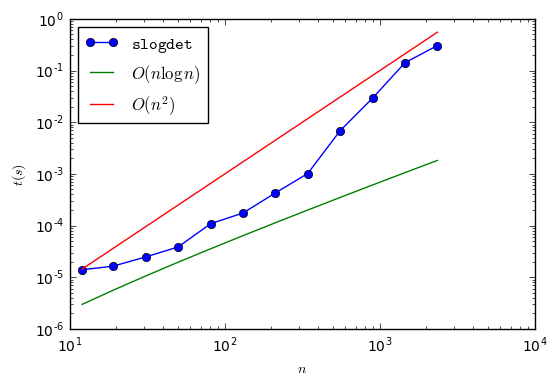

In [56]:
plt.loglog(N, times, marker='o', label='$\mathtt{slogdet}$')
plt.loglog(N, 1e-7*N*np.log(N), label='$O(n\log\, n)$')
plt.loglog(N, 1e-7*N**2, label='$O(n^2)$')
plt.xlabel('$n$')
plt.ylabel('$t (s)$')
plt.legend(loc=0);